### Import libraries and load the data set

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [2]:
# Import the data set
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)

### Explore the data set

In [3]:
#Explore the first ten rows of the data set
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In the output provided, each row represents an individual entry. The columns represent specific features like the identification number, credit limit, sex, education, marriage status, age, payment status across several months, bill statement amounts, payment amounts, and a target variable indicating default in the following month. The numerical data in each column provides information about the respective feature or attribute. The "default payment next month" column represents the class label or target variable for classification tasks in an SVM.

In [4]:
# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#Remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


To clean up the data set, rename and simplify the "default payment next month" column to "DEFAULT", making it convenient for further analysis or modeling tasks. The DataFrame also no longer contains the ID column because it is considered non-informative for analysis or modeling tasks.

### Analyzing missing data

In [5]:
#Checking for missing values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

As you can see, there are no missing values

#### check dimensions for invalid values

In [6]:
df['SEX'].unique()

array([2, 1])

In [7]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [10]:
# count missing or null values
print(len(df[pd.isnull(df.SEX)]))
print(len(df[pd.isnull(df.MARRIAGE)]))
print(len(df[pd.isnull(df.EDUCATION)]))
print(len(df[pd.isnull(df.AGE)]))


0
0
0
0


In [11]:
#count of missing data
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

The output indicates that some of the data does not align with the data definitions, specifically EDUCATION and MARRIAGE columns. EDUCATION includes three types of invalid values, which are 0, 5, and 6, and the MARRIAGE column includes 0 as an invalid value. Assume that a 0 encoding is supposed to represent missing data and that a value of 5 or 6 within EDUCATION is representative of other unspecified education levels (for example, Ph.D. or a master's degree), which is not represented within the data definition.

68 rows exist in the DataFrame where either the EDUCATION or the MARRIAGE column is zero. Next, filter the rows where the EDUCATION and MARRIAGE columns have non-zero values.

In [12]:
#Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

The new DataFrame contains rows where the EDUCATION column and the MARRIAGE column do not have values equal to 0; this filtering yields 29,932 rows. Now that you have removed these missing values, check whether the number of defaults in this data set is balanced.

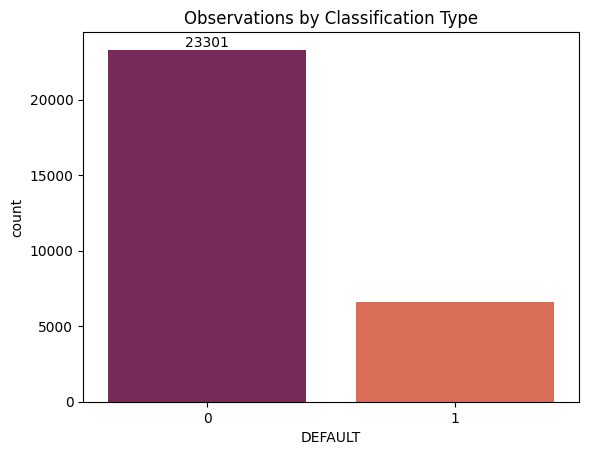

In [15]:
# Explore distribution of dataset
ax = sns.countplot(x='DEFAULT', hue='DEFAULT', data=df_no_missing_data, palette='rocket', legend=False)

# Add data labels
ax.bar_label(ax.containers[0])

# Add plot title
plt.title("Observations by Classification Type")

# Show plot
plt.show()

The output displays the count of accounts with and without a credit card default, indicating an unbalanced data set. To address this, downsample the data to balance it out.

### Downsample the data set

In this step, you balance the data set by splitting the data set into two categories: individuals regularly paying their credit card debt (default) and individuals whose debt remains unpaid (no default). You then downsample the data set by obtaining 1,000 samples for each category, representing the default payment as Yes = 1 and No = 0. From there, you merge the two data sets to create your balanced data set.

In [17]:
from sklearn.utils import resample

# split data
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==1)]

# downsample the data set
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42 )
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 )

#check ouput
len(df_no_default_downsampled)
len(df_default_downsampled)

# merge the data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ])
len(df_downsample)

2000

### Hot-encode independent variables

Scikit-learn does not natively support categorical data, and as a result, you must transform this data using hot-encoding, which codes each category in a given column as a binary variable using 0 or 1. This data transformation prevents SVM from treating the data as continuous, and ensures that each categorical variable has an equal likelihood of clustering together. You use OneHotEncoder for this task.

In [18]:
from sklearn.preprocessing import OneHotEncoder
# isolate independent variables
X = df_downsample.drop('DEFAULT', axis=1).copy()

ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
X_ohe_train = ohe.transform(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

X_ohe_train

transformed_ohe = pd.DataFrame(
    data=X_ohe_train,
    columns=ohe.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
    index=X.index,
)
transformed_ohe.head()

# merge dataframes
X_encoded = pd.concat([X, transformed_ohe], axis=1)
X_encoded

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,2,3,1,28,0,0,0,0,-2,...,0,1,0,0,0,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16004,180000,2,2,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,1,0,0,0,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
14072,320000,1,1,1,43,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,0,0,1,0,0,0,0,0,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Split the data set

You must split the data set into two distinct sets: the training set and the test set. The training set trains the SVM model to differentiate between different classes based on the features provided. The test set helps you to evaluate model performance.

You should also scale your data before applying your SVM model to the data. This means that your independent variables (that is, X_encoded) have a mean of zero and a standard deviation of 1. You scale the data "to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges," enabling SVMs to find an optimal solution more quickly.

In [19]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Classify accounts and evaluate the model

Accuracy: 68.50%


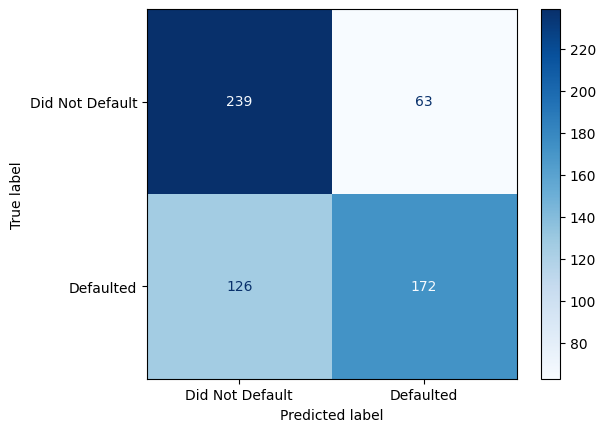

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)

Here, you can see that your classifier did not perform as well as expected. Of the 302 accounts that did not default, and of the 298 accounts that did default, only 79% (239 accounts) and 58% (172 accounts) were correctly classified in their respective categories.

### Optimize model with hyperparameter tuning

To improve model performance, you can use both cross validation and GridSearchCV() to find the optimal hyperparameters within your model. More specifically, you're looking to identify the best values for your regularization parameter (C), gamma, and kernel.

You might recall from your SVM explainer that your C parameter applies a penalty for misclassifications and your gamma parameter applies weights for different data points. It's important to be aware that higher values of gamma have a tendency to increase the risk of overfitting the training set, which in turn leads to poor generalization onto new data. For the sake of data processing time, you only use the radial basis function kernel (RBF kernel) for this hyperparameter optimization, but note that this could include other kernels, such as poly or sigmoid.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.682 total time=   0.4s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.689 total time=   0.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.725 total time=   0.1s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.707 total time=   0.1s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.525 total time=   0.1s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.561 total time=   0.1s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.536 total time=   0.1s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.554 total time=   0.1s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.1s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

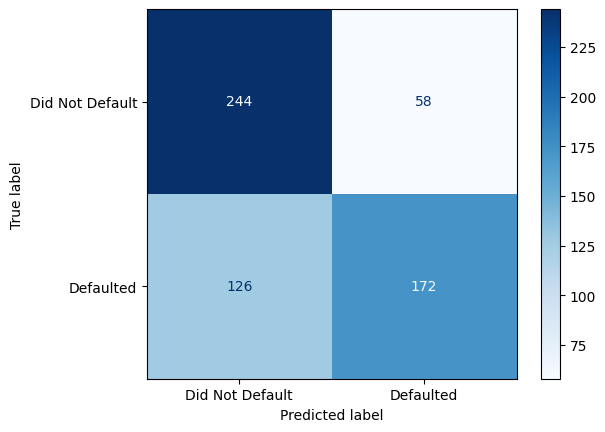

In [22]:
param_grid = {'C':[0.5,0.1,1,10,100,1000],
              'gamma':['scale', 1,0.1, 0.01,0.001,0.0001],
              'kernel':['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)
optimal_params.fit(X_train_scaled, y_train)

# see "best" parameters
optimal_params.best_params_

# refit model with optimal hyperparameters
grid_predictions = optimal_params.predict(X_test.values)
clf_svm = SVC(random_state = 42, C=.5, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# plot confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)